In [1]:
#Importing dependencies
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Connecting Database instance 
conn = sqlite3.connect('../database/delhi.sqlite')

In [3]:
#Creating the cursor
c = conn.cursor()

In [4]:
#Creating the DataFrame
query = c.execute("SELECT * From delhi_table;")
cols = [column[0] for column in query.description]
df= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
df

,datetime_utc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm
0,19961101-11:00,Haze,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,19961101-16:00,Haze,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0
2,19961101-18:00,Haze,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,North,0.0
3,19961102-02:00,Haze,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,SSW,9.3
4,19961102-03:00,Haze,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,WSW,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80652,20170424-06:00,Haze,17.0,0,0,25.0,1005.0,0,0,34.0,0,0,4.0,320.0,NW,11.1
80653,20170424-09:00,Haze,14.0,0,0,16.0,1003.0,0,0,38.0,0,0,4.0,320.0,NW,22.2
80654,20170424-12:00,Haze,12.0,0,0,14.0,1002.0,0,0,36.0,0,0,4.0,270.0,West,18.5
80655,20170424-15:00,Haze,15.0,0,0,27.0,1004.0,0,0,32.0,0,0,2.0,320.0,NW,3.7


In [5]:
# Dropping two columns 'datetime_utc', 'wdire'
df = df.drop(['datetime_utc', 'wdire'], axis =1)
df.head()

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
0,Haze,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,7.4
1,Haze,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,0.0
2,Haze,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,0.0
3,Haze,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,9.3
4,Haze,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,9.3


In [6]:
ordered_columns = ['dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wspdm', 'conds']
df = df[ordered_columns]

In [7]:
df.head()

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm,conds
0,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,7.4,Haze
1,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,0.0,Haze
2,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,0.0,Haze
3,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,9.3,Haze
4,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,9.3,Haze


In [8]:
df.conds.value_counts()

Haze      65925
Rain       6022
Cloudy     5832
Clear      2878
Name: conds, dtype: int64

In [9]:
# Create our features
X = df.drop("conds", axis=1)

# Create our target
y = df["conds"]
X.describe()

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
count,80657.000000,80657.000000,80657.000000,80657.000000,8.065700e+04,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000
mean,15.676445,0.050907,0.000136,55.171926,2.199730e+03,0.027102,0.000012,26.340045,0.010216,0.000025,2.563318,169.093891,8.976131
std,7.150146,0.219809,0.011677,23.447379,3.558458e+05,0.162383,0.003521,8.242780,0.100558,0.004980,22.690289,118.166457,12.084670
min,-24.000000,0.000000,0.000000,4.000000,-9.999000e+03,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,36.000000,1.001000e+03,0.000000,0.000000,20.000000,0.000000,0.000000,1.800000,60.000000,3.700000
50%,15.000000,0.000000,0.000000,55.000000,1.008000e+03,0.000000,0.000000,28.000000,0.000000,0.000000,2.200000,170.000000,7.400000
75%,22.000000,0.000000,0.000000,74.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.000000,3.000000,270.000000,13.000000
max,35.000000,1.000000,1.000000,100.000000,1.010614e+08,1.000000,1.000000,72.000000,1.000000,1.000000,6436.000000,960.000000,1514.900000


In [10]:
y.value_counts()

Haze      65925
Rain       6022
Cloudy     5832
Clear      2878
Name: conds, dtype: int64

# Split the Data into Training and Testing¶

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# RandomForestClassifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1, n_estimators=500)
rfc_model = model.fit(X_train, y_train)

In [13]:
rfc_model.score(X_train,y_train)

0.9970905243668584

In [14]:
rfc_model.score(X_test,y_test)

0.9022563848251922

In [15]:
rfc_ypred = rfc_model.predict(X_test)
rfc_ypred

array(['Haze', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

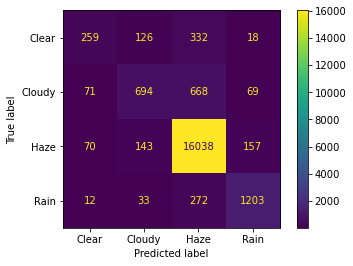

In [16]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rfc_cm = confusion_matrix(y_test, rfc_ypred, labels=rfc_model.classes_)
rfc_disp = ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=rfc_model.classes_)
rfc_disp.plot()

In [17]:
# Calulating the accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rfc_ypred)

0.9022563848251922

In [18]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, rfc_ypred)

0.6458322360953556

In [19]:
# printing the classification report
from sklearn.metrics import classification_report
rfc_clf_report = (classification_report(y_test, rfc_ypred))
print(rfc_clf_report)

              precision    recall  f1-score   support

       Clear       0.63      0.35      0.45       735
      Cloudy       0.70      0.46      0.56      1502
        Haze       0.93      0.98      0.95     16408
        Rain       0.83      0.79      0.81      1520

    accuracy                           0.90     20165
   macro avg       0.77      0.65      0.69     20165
weighted avg       0.89      0.90      0.89     20165



In [20]:
# check Important features
ft_imp_rfc = pd.DataFrame(
    {"feature": list(X.columns), "importance": rfc_model.feature_importances_}
).sort_values("importance", ascending=False)

# Display
ft_imp_rfc

,feature,importance
10,vism,0.209115
3,hum,0.178317
4,pressurem,0.108404
11,wdird,0.099674
5,rain,0.098439
7,tempm,0.094327
0,dewptm,0.085740
12,wspdm,0.076194
8,thunder,0.026486
1,fog,0.023218


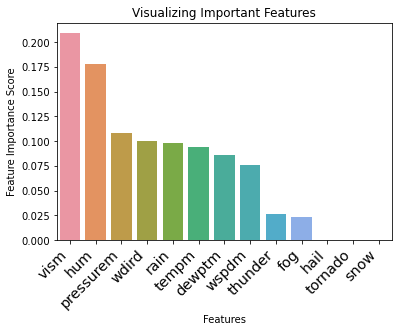

In [21]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=ft_imp_rfc.feature, y=ft_imp_rfc.importance)
# Add labels to your

plt.ylabel("Feature Importance Score")
plt.xlabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

# RandomOverSampling

In [22]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({'Clear': 49517, 'Haze': 49517, 'Cloudy': 49517, 'Rain': 49517})

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc_ros_model = RandomForestClassifier(random_state=1, n_estimators=500)
rfc_ros_model.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=500, random_state=1)

In [24]:
rfc_ros_model.score(X_resampled, y_resampled)

0.9974251267241553

In [25]:
rfc_ros_model.score(X_test, y_test)

0.9016612943218448

In [26]:
rfc_ros_ypred = rfc_ros_model.predict(X_test)
rfc_ros_ypred

array(['Haze', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

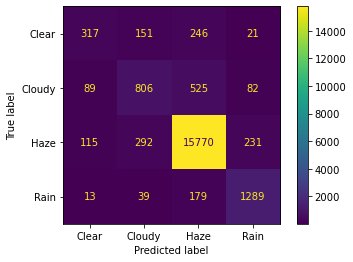

In [27]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rfc_ros_cm = confusion_matrix(y_test, rfc_ros_ypred, labels=rfc_ros_model.classes_)
rfc_ros_disp = ConfusionMatrixDisplay(confusion_matrix=rfc_ros_cm, display_labels=rfc_ros_model.classes_)
rfc_ros_disp.plot()

In [28]:
# Calulating the accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rfc_ros_ypred)

0.9016612943218448

In [29]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, rfc_ros_ypred)

0.6942633010487783

In [30]:
# printing the classification report
from sklearn.metrics import classification_report
rfc_ros_clf_report = (classification_report(y_test, rfc_ros_ypred))
print(rfc_ros_clf_report)

              precision    recall  f1-score   support

       Clear       0.59      0.43      0.50       735
      Cloudy       0.63      0.54      0.58      1502
        Haze       0.94      0.96      0.95     16408
        Rain       0.79      0.85      0.82      1520

    accuracy                           0.90     20165
   macro avg       0.74      0.69      0.71     20165
weighted avg       0.90      0.90      0.90     20165



In [31]:
# check Important features
ft_imp_rfc_ros = pd.DataFrame(
    {"feature": list(X.columns), "importance": rfc_ros_model.feature_importances_}
).sort_values("importance", ascending=False)

# Display
ft_imp_rfc_ros

,feature,importance
10,vism,0.181438
3,hum,0.180945
4,pressurem,0.122245
0,dewptm,0.109992
7,tempm,0.107656
11,wdird,0.105416
12,wspdm,0.084380
5,rain,0.072990
1,fog,0.017576
8,thunder,0.017235


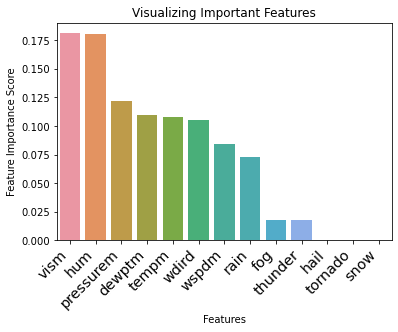

In [32]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=ft_imp_rfc_ros.feature, y=ft_imp_rfc_ros.importance)
# Add labels to your

plt.ylabel("Feature Importance Score")
plt.xlabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

# RandomUnderSampling

In [33]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'Clear': 2143, 'Cloudy': 2143, 'Haze': 2143, 'Rain': 2143})

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc_rus_model = RandomForestClassifier(random_state=1, n_estimators=500)
rfc_rus_model.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=500, random_state=1)

In [35]:
rfc_rus_model.score(X_resampled, y_resampled)

0.9976668222118525

In [36]:
rfc_rus_model.score(X_test, y_test)

0.7955368212248947

In [37]:
rfc_rus_ypred = rfc_rus_model.predict(X_test)
rfc_rus_ypred

array(['Clear', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

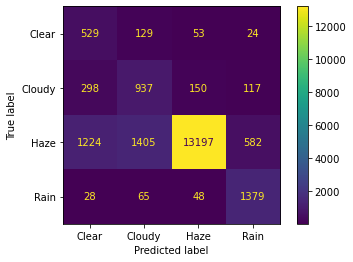

In [38]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rfc_rus_cm = confusion_matrix(y_test, rfc_rus_ypred, labels=rfc_rus_model.classes_)
rfc_rus_disp = ConfusionMatrixDisplay(confusion_matrix=rfc_rus_cm, display_labels=rfc_rus_model.classes_)
rfc_rus_disp.plot()

In [39]:
# Calulating the accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rfc_rus_ypred)

0.7955368212248947

In [40]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, rfc_rus_ypred)

0.7637755998028583

In [41]:
# printing the classification report
from sklearn.metrics import classification_report
rfc_rus_clf_report = (classification_report(y_test, rfc_rus_ypred))
print(rfc_rus_clf_report)

              precision    recall  f1-score   support

       Clear       0.25      0.72      0.38       735
      Cloudy       0.37      0.62      0.46      1502
        Haze       0.98      0.80      0.88     16408
        Rain       0.66      0.91      0.76      1520

    accuracy                           0.80     20165
   macro avg       0.57      0.76      0.62     20165
weighted avg       0.88      0.80      0.83     20165



In [42]:
# check Important features
ft_imp_rfc_rus = pd.DataFrame(
    {"feature": list(X.columns), "importance": rfc_rus_model.feature_importances_}
).sort_values("importance", ascending=False)

# Display
ft_imp_rfc_ros

,feature,importance
10,vism,0.181438
3,hum,0.180945
4,pressurem,0.122245
0,dewptm,0.109992
7,tempm,0.107656
11,wdird,0.105416
12,wspdm,0.084380
5,rain,0.072990
1,fog,0.017576
8,thunder,0.017235


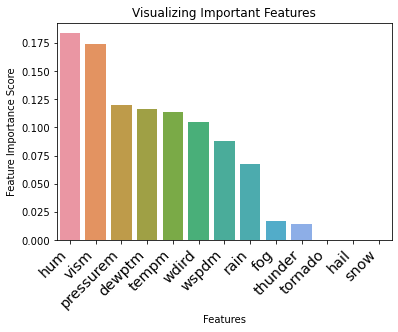

In [43]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=ft_imp_rfc_rus.feature, y=ft_imp_rfc_rus.importance)
# Add labels to your

plt.ylabel("Feature Importance Score")
plt.xlabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()